In [6]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import shap
import pandas as pd
import numpy as np

# Example dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train GradientBoostingClassifier
model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
model.fit(X_train, y_train)

# Initialize SHAP TreeExplainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Get top contributing features
top_features = pd.DataFrame({
    'feature': feature_names,
    'importance': np.abs(shap_values).mean(0)
}).sort_values('importance', ascending=False)

print(top_features)


                    feature  importance
27     worst concave points    1.387789
7       mean concave points    1.194664
20             worst radius    1.031997
22          worst perimeter    0.823792
26          worst concavity    0.693006
21            worst texture    0.683849
23               worst area    0.608981
13               area error    0.333812
1              mean texture    0.327353
10             radius error    0.284399
3                 mean area    0.197904
24         worst smoothness    0.177158
5          mean compactness    0.127638
15        compactness error    0.087836
17     concave points error    0.086131
28           worst symmetry    0.064069
16          concavity error    0.056305
2            mean perimeter    0.044206
12          perimeter error    0.038282
6            mean concavity    0.036228
14         smoothness error    0.019428
9    mean fractal dimension    0.017463
25        worst compactness    0.014395
8             mean symmetry    0.011381


In [7]:
def format_top_features(features, shap_values):
    """Helper to format top features."""
    top_indices = np.argsort(np.abs(shap_values[0]))[::-1][:5]  # Top 5 features
    return [(feature_names[i], shap_values[0][i]) for i in top_indices]

def generate_explanation(features, prediction, shap_values):
    """Generate explanation for model prediction."""
    formatted_features = format_top_features(features, shap_values)
    explanation = f"""
    Risk Score Explanation:
    Predicted risk score: {prediction}
    Top contributing features:
    {formatted_features}

    Recommendations:
    - Address key negative factors.
    - Leverage positive factors to improve score.
    """
    return explanation


In [8]:
class ExplainableCreditRisk:
    def __init__(self):
        self.base_model = GradientBoostingClassifier(
            n_estimators=100,
            learning_rate=0.1,
            max_depth=3,
            random_state=42
        )
        self.explainer = None  # Will initialize after training

    def train_model(self, X_train, y_train):
        """Train the Gradient Boosting model and initialize SHAP explainer."""
        self.base_model.fit(X_train, y_train)
        self.explainer = shap.TreeExplainer(self.base_model)

    def predict_and_explain(self, features):
        """Predict risk score and generate explanation."""
        # Predict risk score
        risk_score = self.base_model.predict_proba(features)[0]
        
        # Generate SHAP values
        shap_values = self.explainer.shap_values(features)
        
        # Generate explanation
        explanation = generate_explanation(features, risk_score, shap_values)
        
        return {
            "risk_score": risk_score,
            "explanation": explanation
        }


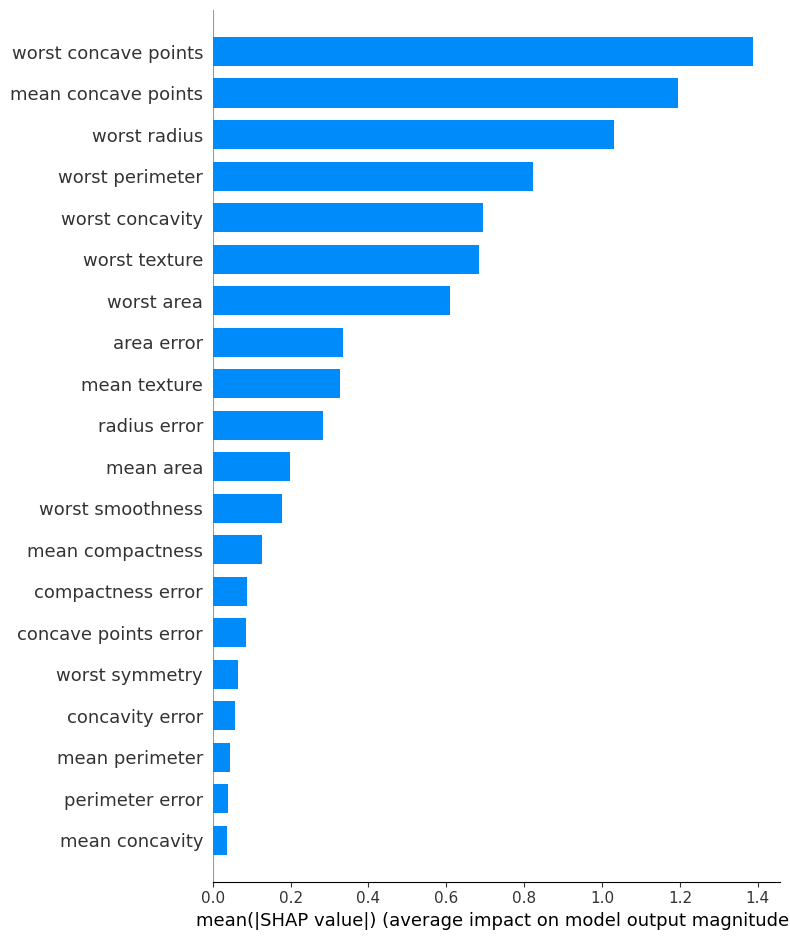


    Risk Score Explanation:
    Predicted risk score: [8.62720920e-04 9.99137279e-01]
    Top contributing features:
    [('mean concave points', 1.1399790708301394), ('worst concave points', 1.1189092642209084), ('worst perimeter', 0.8199190978652257), ('worst radius', 0.5822319739553976), ('worst area', 0.566423329290217)]

    Recommendations:
    - Address key negative factors.
    - Leverage positive factors to improve score.
    


In [9]:
# Visualize SHAP values
shap.summary_plot(shap_values, X_test, feature_names=feature_names, plot_type="bar")

# Example: Generate explanation for the first test instance
example_features = X_test[0].reshape(1, -1)
example_risk_score = model.predict_proba(example_features)[0]
example_shap_values = explainer.shap_values(example_features)

# Generate explanation for a single instance
print(generate_explanation(example_features, example_risk_score, example_shap_values))
